# Исследования рынка компьютерных игр

В нашем распоряжении есть данные о продажах компьютерных игр за 2016 год. В данных содержатся оценки пользователей и экспертов, а также информация о жанрах и платформах.

Нам необходимо провести исследование для международного интернет-магазина "Стримчик". Наша задача - выявить закономерности, которые определяют успешность игры. Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию.

Ход работы: 
- Обзор данных;
- Предобработка данных; 
- Исследовательский анализ;
- Портрет пользователя каждого региона;
- Проверка гипотез.



## Загрузка данных

In [1]:
# импорт библиоте 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

Данных достаточно, есть с чем работать. Уже можем заметить некоторые пропущенные значения и стилистическую ошибку в названиях столбцов.

## Подготовка данных
* Заменить названия столбцов (приведите к нижнему регистру);
* Преобразовать данные в нужные типы;
* Обработать пропуски при необходимости:
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Заменим названия столбцов (приведем к нижнему регистру)

In [3]:
# приведе в нижний регистр название столбцов
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

In [7]:
# проверим пропуски 
df['year_of_release'].isna().sum()

269

In [8]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# избавимся от пропусков и перезапишем в формате 'int'
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

Оценки пользователей преобразуем в такой же формат, как у оценки критиков, т.е. float

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# кроме пропуском есть еще и значение tbd, посмотрим сколько их
df[df['user_score'] == 'tbd']['user_score'].count()

2376

In [12]:
# заполним np.nan, чтобы поменять на float
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

### Проверим есть ли пропуски в других стоблцах

In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [14]:
# всего лишь по 2 пропуска  в столбцах 'name' и 'genre'. Удаляем. 
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)

Пропуски в столбцах с оценками корректно не получится заполнить. Ведь одну и ту же игру могут оценивать по-разному в зависимости от того, на какой платформе она выпущена. Поэтому оставим как есть.

А столбец с рейтингом заполним значением 'no rating'.

In [15]:
df['rating'] = df['rating'].fillna('no rating')

### Добавим столбец с суммарными продажами во всех регионах 

In [16]:
# добавляем столбец 'total_sales'
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


Важно проверить наличие неявных дубликатов по сумме значение в избранных колонках. Для этого сначала приведем название игр в нижний регситр. 

In [17]:
# название игр приведем в нижний регистр 
df['name'] = df['name'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


In [18]:
# проверим наличие дубликатов по нескольким столбцам 
df.duplicated(['name', 'platform', 'year_of_release'], keep=False).sum()

2

In [19]:
# удалим дубликаты
df = df.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])

**Выводы** по подготовке данных:
* year_of_release - перезаписали как int;
* user_score - привели к вещественному типу, 'tbd' заменили на NaN;
* удалили пропущенные значения в следующих столбцах 'name' и 'genre', так как их было по 2;
* в столбцах 'critic_score' и 'user_score' пропущенные значения не удаляем, так как их отсутствие отразится на данных при расчетах в будущем;
* столбец с рейтингом заполнили значением 'no rating';
* удалили неявные дубликаты.

## Исследовательский анализ данных

План работы:
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Выяснить, какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим, сколько игр выпускалось в разные годы.

In [20]:
# создадаем отдельный датафрейм с кол-вом выпущенных игра в разные годы
releases_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
releases_per_year = releases_per_year.reset_index()
releases_per_year.columns=['year_of_release', 'quantity']
releases_per_year.head()

,year_of_release,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


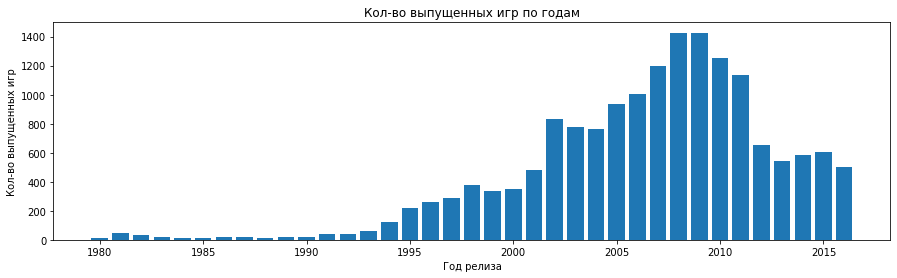

In [21]:
# построим на графике
a = releases_per_year['year_of_release']
b = releases_per_year['quantity']

fig, ax = plt.subplots()
plt.bar(a, b)
fig.set_figwidth(15)
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во выпущенных игр')
plt.show()

Игры начали выпускаться с 80-х годов ХХ века, и темпы особо сильно не менялись вплоть до 1994 года. К слову, первый PlayStation вышел в продажу в 1994 году. Конец ХХ века и начало века цифровых технологий дают о себе знать. Резкий скачок произошел в 2002 году, возможно, благодаря появлению еще одной платформы. Пик продаж приходится на 2005-2011 годы, дальше уже наблюдается спад.

### Посмотреть, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

In [22]:
# найдем топ платформ по продажам
top_sale = df.pivot_table(index='platform', values='total_sales',  aggfunc='sum')
top_sale = top_sale.reset_index()
top_sale.sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [23]:
# Найдем топ платформ по выпущенным играм
top_platform = df.pivot_table(index='platform', values='year_of_release', aggfunc='count')
top_platform = top_platform.reset_index()
top_platform.sort_values(by='year_of_release', ascending=False)

,platform,year_of_release
16,PS2,2127
4,DS,2121
17,PS3,1305
26,Wii,1286
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,957
6,GBA,811
29,XB,803


Топ платформы по продажам у нас - PS2, X360, PS3, Wii, DS и PS.

In [24]:
# распределим продажи по годам и топ платформам 
platform_on_year = pd.DataFrame(df.groupby(['platform','year_of_release'])['total_sales'].sum())
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
platforms_top = platform_on_year.query('platform in @platform_list').reset_index()
platforms_top.head()

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


Год релиза Nintendo DS - 2004 год, а в даатсете есть игра выпущенная в 1985 году. Можем удалить все что раньше 2004 года из датафрейма. 

In [25]:
# удаляем эти значения из стобца 
platforms_top = platforms_top.loc[(platforms_top['platform'] != 'DS') | (platforms_top['year_of_release'] >= 2004)]

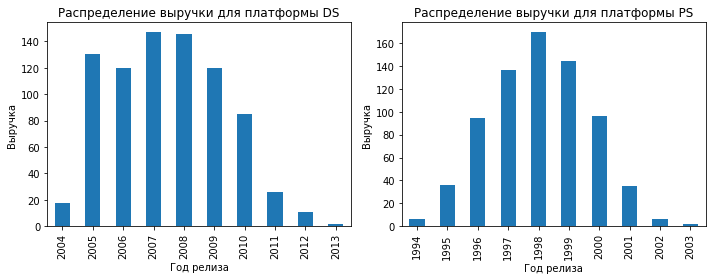

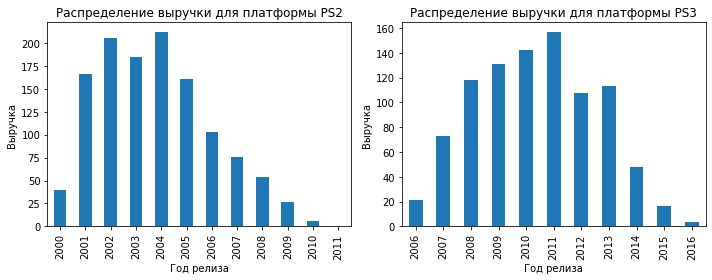

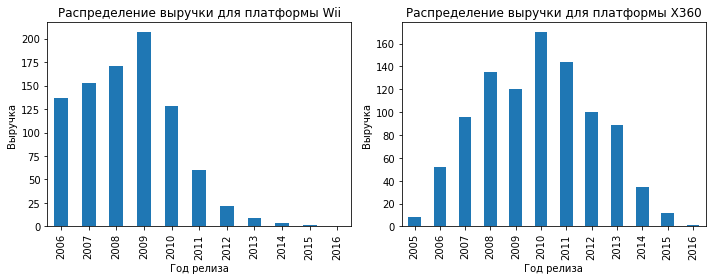

In [26]:
# создаем графики
plat = platforms_top['platform'].unique()

for i in range(0, len(plat), 2):
    plt.figure(figsize=(10, 4))
    
    for j, platform in enumerate(plat[i:i+2]):
        platform_df = platforms_top[platforms_top['platform'] == platform]
        plt.subplot(1, 2, j+1)
        platform_df.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
        plt.xlabel('Год релиза')
        plt.ylabel('Выручка')
        plt.title(f'Распределение выручки для платформы {platform}')
    
    plt.tight_layout()
    plt.show()

In [27]:
# выясним за какой срок исчезают платформы
time_platforms = platforms_top.groupby('platform').agg({'year_of_release' : 'max'}) - \
platforms_top.groupby('platform').agg({'year_of_release' : 'min'}) 
time_platforms

,year_of_release
platform,
DS,9
PS,9
PS2,11
PS3,10
Wii,10
X360,11


In [28]:
time_platforms.describe()

,year_of_release
count,6.000000
mean,10.000000
std,0.894427
min,9.000000
25%,9.250000
50%,10.000000
75%,10.750000
max,11.000000


Для самых популярных платформ средняя продолжительность составляет 10 лет. 

### Данные за соответствующий актуальный период. Выяснить, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

Обычно в бизнесе актуальным периодом считается данные за 2-3 года. Поскольку у нас имеются данные на 2016 год, мы рассматриваем период с 2014 по 2016 год. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды.

In [29]:
# создадим срез 
period = (2014, 2016)
period_df = df.query('@period[0] <= year_of_release <= @period[1]').reset_index()
period_df = period_df.drop('index', 1)
period_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
1,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
3,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98


In [30]:
# создадим отдельную таблицу продаж по годам каждой платформы
plat_year = period_df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
plat_year

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


По таблице видно, что продажи растут у PS4 и Xbox One.

Также выделяются платформы 3DS, PSV, PS3, Xbox 360 и Wii U, которые испытывают спад в 2015 году. Вероятно, это связано с появлением новых платформ на рынке. 


### График "ящик с усами" по глобальным продажам в разбивке по платформам

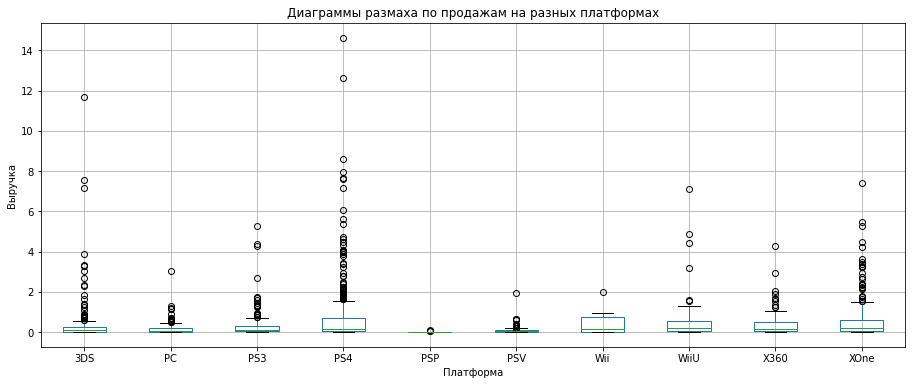

In [31]:
# создаем график 
period_df[['total_sales', 'platform']].boxplot(column='total_sales', by='platform', figsize=(15, 6))

plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.title('Диаграммы размаха по продажам на разных платформах')
plt.suptitle('')
plt.show()

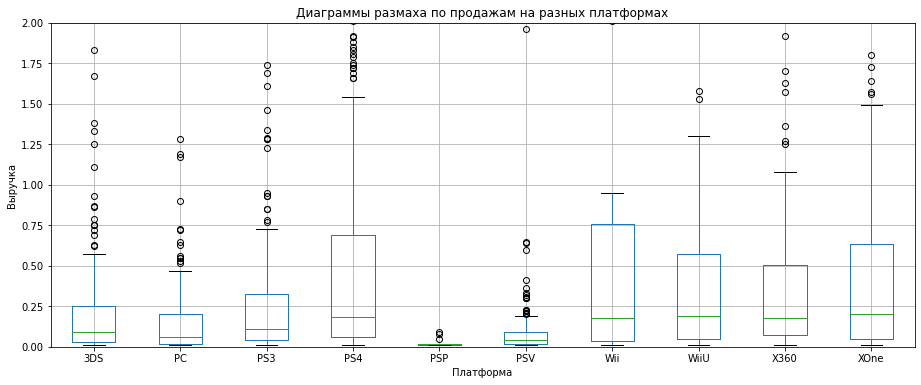

In [32]:
# создаем график
period_df[['total_sales', 'platform']].boxplot(column='total_sales', by='platform', figsize=(15, 6))

plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.title('Диаграммы размаха по продажам на разных платформах')
plt.suptitle('')

# выбросов много, трудно разглядеть ящики. По этому придадим масштаб
plt.ylim(0, 2) 
plt.show()

In [33]:
# создадим отдельную таблицу продаж по платформам
period_df.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean'])

,sum,mean
,total_sales,total_sales
platform,,
3DS,86.68,0.408868
PC,27.05,0.179139
PS3,68.18,0.311324
PS4,288.15,0.766356
PSP,0.36,0.027692
PSV,22.40,0.075932
Wii,5.07,0.460909
WiiU,42.98,0.588767


На данный момент среди платформ с самой высокой выручкой выделяются 3DS, PS3, PS4, X360 и XOne, так как это актуальное поколение консолей на выбранный нами период. Если посмотреть на средний доход, то стоит отметить также Wii и WiiU, кроме вышеперечисленных платформ.

Как ни странно, ПК не особо пользуется популярностью.

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

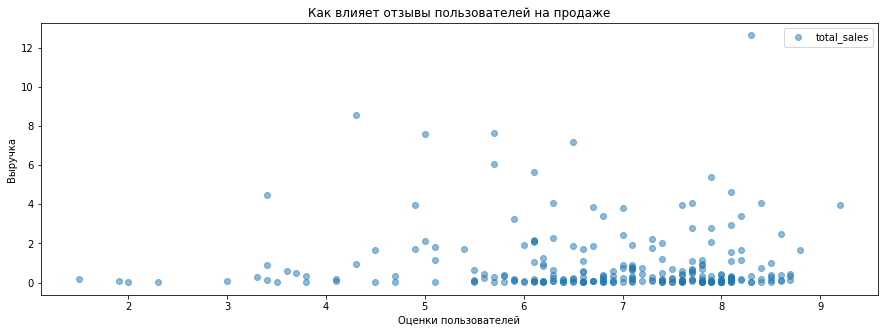

In [34]:
# в качестве примера одной платформы возьмем PS4, так как она на первом месте по показателям
period_df.query('platform == "PS4"').plot(y='total_sales', x='user_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки пользователей')
plt.title('Как влияет отзывы пользователей на продаже')
plt.show()

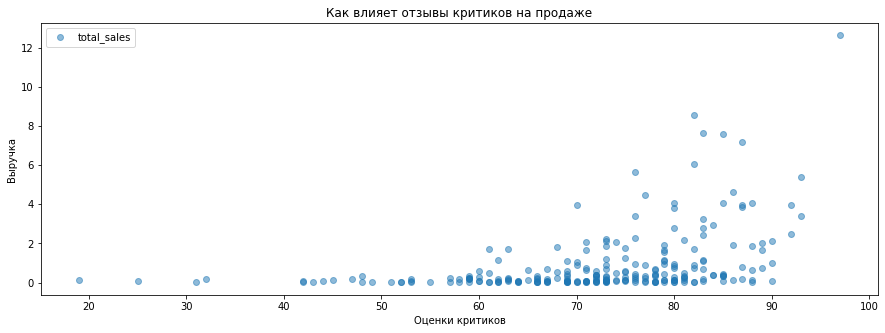

In [35]:
# теперь тоже самое, но уже на основе оценок от критиков
period_df.query('platform == "PS4"').plot(y='total_sales', x='critic_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки критиков')
plt.title('Как влияет отзывы критиков на продаже')
plt.show()

In [36]:
# создадим срез чтобы посчитать корреляцию
ps4_rating = period_df.query('platform == "PS4"')
ps4_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
1,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
5,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [37]:
corr_critic = ps4_rating['critic_score'].corr(ps4_rating['total_sales'])
print(f'Корреляция между отзывами критиков и продажами: {corr_critic}')
corr_user = ps4_rating['user_score'].corr(ps4_rating['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {corr_user}')

Корреляция между отзывами критиков и продажами: 0.40266141068104083
Корреляция между отзывами пользователей и продажами: -0.040131589472697356


Корреляция между отзывами критиков и продажами положительная, но умеренная. По этому связь между оценка критиков и продажами относительно слабая. 

Корреляция между отзывами пользователей и продажами еще ниже, свзяь имеется, но слабее чем между отзывами критиков и продажами.

Сравним с другими платформами из топ 5 (PS3, XOne, X360 и 3DS).

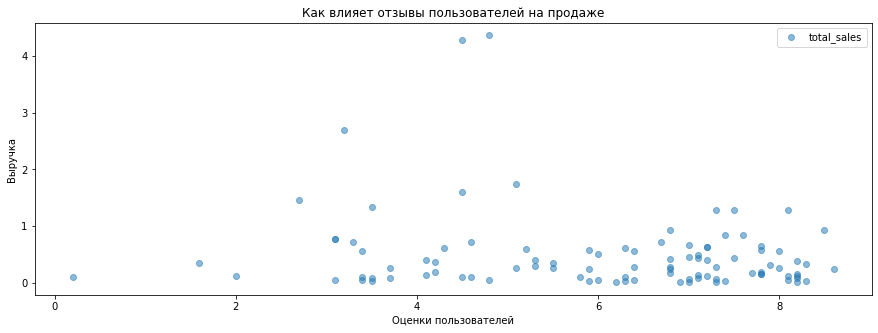

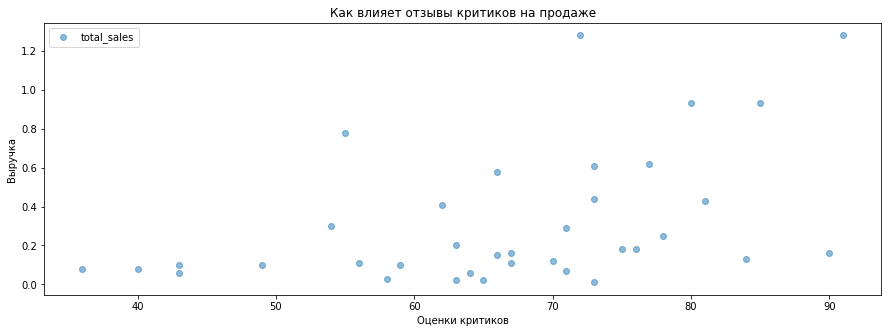

In [38]:
# PS3
period_df.query('platform == "PS3"').plot(y='total_sales', x='user_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки пользователей')
plt.title('Как влияет отзывы пользователей на продаже')
plt.show()
period_df.query('platform == "PS3"').plot(y='total_sales', x='critic_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки критиков')
plt.title('Как влияет отзывы критиков на продаже')
plt.show()

In [39]:
# создадим срез чтобы посчитать корреляцию
ps3_rating = period_df.query('platform == "PS3"')
critic_ps3 = ps3_rating['critic_score'].corr(ps3_rating['total_sales'])
print(f'Корреляция между отзывами критиков и продажами: {critic_ps3}')
user_ps3 = ps3_rating['user_score'].corr(ps3_rating['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {user_ps3}')

Корреляция между отзывами критиков и продажами: 0.44657460493190704
Корреляция между отзывами пользователей и продажами: -0.16676141347662118


Продажи не так сильно зависят от отзывов критиков. А от отзывов пользователей совсем не зависит, так как корреляция близка к 0.

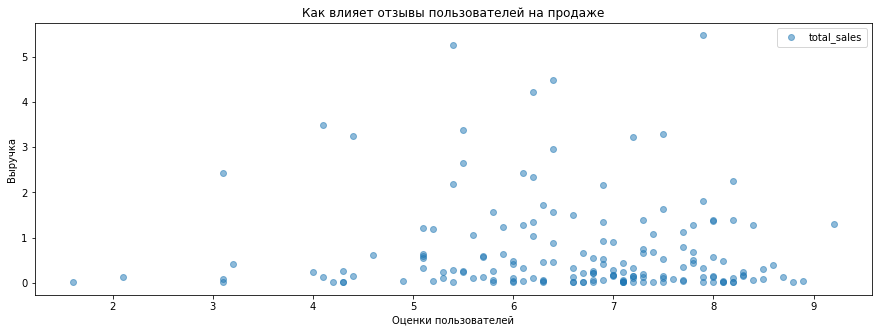

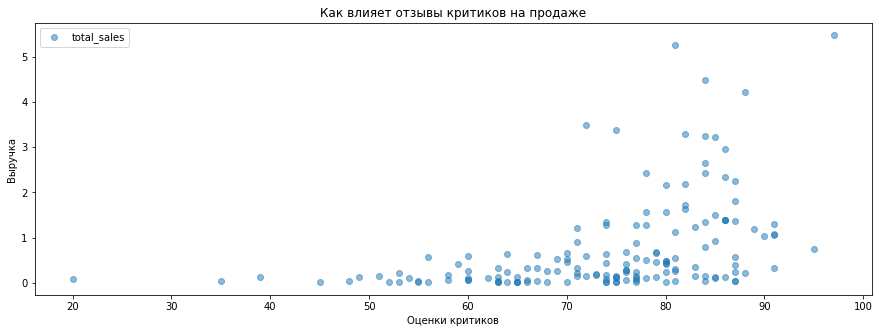

In [40]:
# XOne
period_df.query('platform == "XOne"').plot(y='total_sales', x='user_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки пользователей')
plt.title('Как влияет отзывы пользователей на продаже')
plt.show()
period_df.query('platform == "XOne"').plot(y='total_sales', x='critic_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки критиков')
plt.title('Как влияет отзывы критиков на продаже')
plt.show()

In [41]:
# создадим срез чтобы посчитать корреляцию
xone_rating = period_df.query('platform == "XOne"')
critic_xone = xone_rating['critic_score'].corr(xone_rating['total_sales'])
print(f'Корреляция между отзывами критиков и продажами: {critic_xone}')
user_xone = xone_rating['user_score'].corr(xone_rating['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {user_xone}')

Корреляция между отзывами критиков и продажами: 0.42867694370333226
Корреляция между отзывами пользователей и продажами: -0.0703839280647581


Ситуация похожа на PS4.

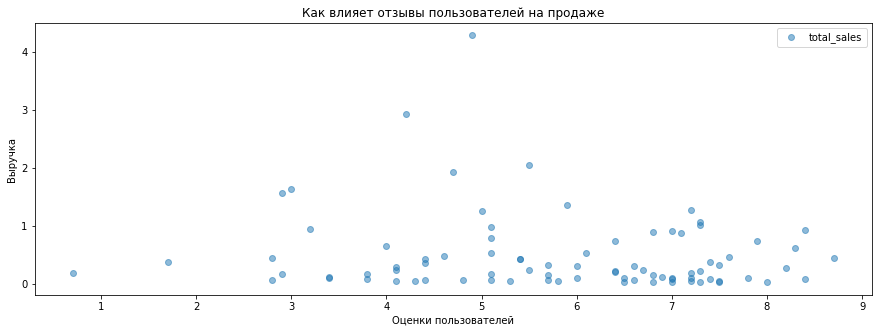

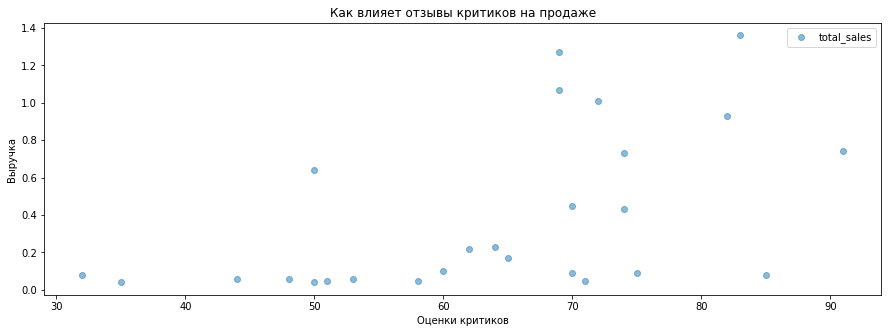

In [42]:
# X360
period_df.query('platform == "X360"').plot(y='total_sales', x='user_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки пользователей')
plt.title('Как влияет отзывы пользователей на продаже')
plt.show()
period_df.query('platform == "X360"').plot(y='total_sales', x='critic_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки критиков')
plt.title('Как влияет отзывы критиков на продаже')
plt.show()

In [43]:
# создадим срез чтобы посчитать корреляцию
x360_rating = period_df.query('platform == "X360"')
critic_x360 = x360_rating['critic_score'].corr(x360_rating['total_sales'])
print(f'Корреляция между отзывами критиков и продажами: {critic_x360}')
user_x360 = x360_rating['user_score'].corr(x360_rating['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {user_x360}')

Корреляция между отзывами критиков и продажами: 0.5257228356581523
Корреляция между отзывами пользователей и продажами: -0.138444570945665


То же самое.

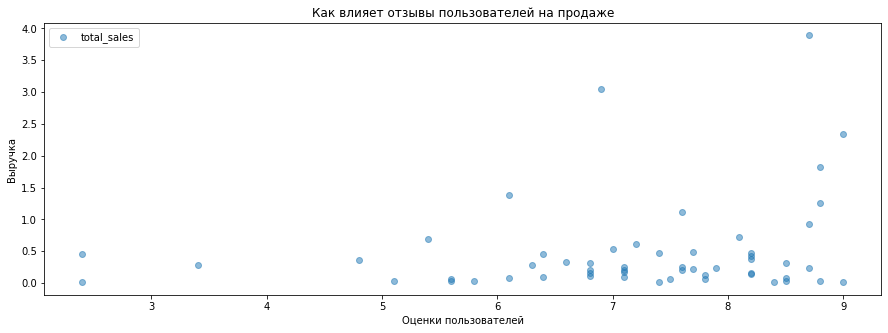

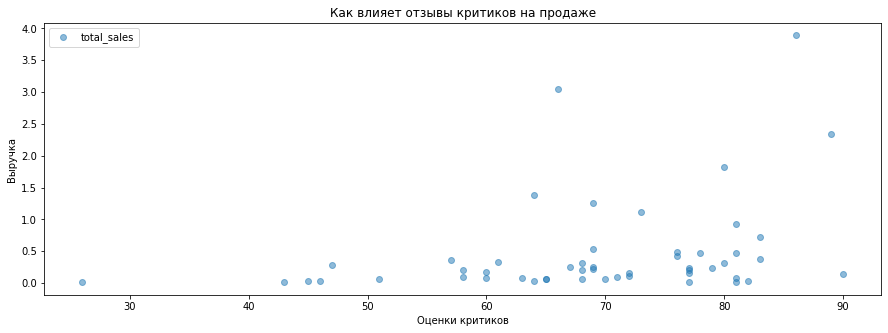

In [44]:
# 3DS
period_df.query('platform == "3DS"').plot(y='total_sales', x='user_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки пользователей')
plt.title('Как влияет отзывы пользователей на продаже')
plt.show()
period_df.query('platform == "3DS"').plot(y='total_sales', x='critic_score', style='o', figsize=(15, 5), alpha=0.5)
plt.ylabel('Выручка')
plt.xlabel('Оценки критиков')
plt.title('Как влияет отзывы критиков на продаже')
plt.show()

In [45]:
# создадим срез чтобы посчитать корреляцию
ds_rating = period_df.query('platform == "3DS"')
critic_ds = ds_rating['critic_score'].corr(ds_rating['total_sales'])
print(f'Корреляция между отзывами критиков и продажами: {critic_ds}')
user_ds = ds_rating['user_score'].corr(ds_rating['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {user_ds}')

Корреляция между отзывами критиков и продажами: 0.314117492869051
Корреляция между отзывами пользователей и продажами: 0.2151932718527028


В целом, данные корреляционные значения указывают на то, что отзывы критиков имеют некоторое влияние на продажи игр, в то время как отзывы пользователей имеют очень слабое. Однако, важно помнить, что корреляция не означает причинно-следственную связь, и другие факторы также могут влиять на продажи игр, такие как маркетинговые кампании, жанр игр, конкуренция на рынке и другие.

### График "ящик с усами" по глобальным продажам в разбивке по жанрам

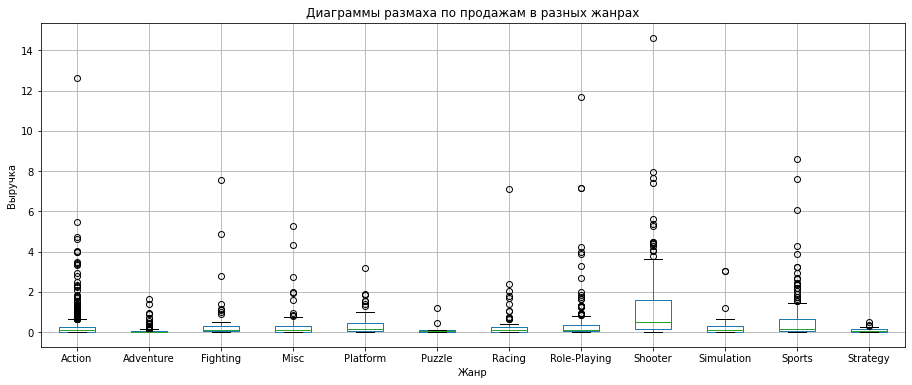

In [46]:
# создаем график 
period_df[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15, 6))

plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.suptitle('')
plt.show()

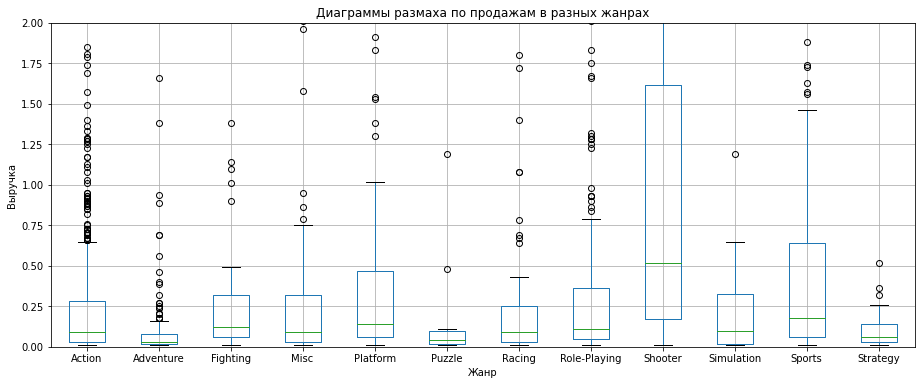

In [47]:
# создаем график
period_df[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15, 6))

plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.suptitle('')

# выбросов много, трудно разглядеть ящики. По этому придадим масштаб
plt.ylim(0, 2) 
plt.show()

In [48]:
# создадим отдельную таблицу продаж по жанрам
period_df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean'])

,sum,mean
,total_sales,total_sales
genre,,
Action,199.36,0.322068
Adventure,17.55,0.094865
Fighting,28.22,0.470333
Misc,37.55,0.332301
Platform,18.09,0.476053
Puzzle,2.21,0.157857
Racing,27.52,0.398841
Role-Playing,101.44,0.459005


Лидерами по продажам жанры - Action, Shooter, Sports, Role-Playing и т.д. Но по средним продажам лидируют Sports, Platform, Role-Playing, Racing, Fighting и только потом Action.

Меньше всего - пазлы, стратегии и симуляторы.

**Выводы** по исследовательскому анализу:

- Индустрия начала развиваться с 80-х годов прошлого века, а резкий скачок произошел с выходом PlayStation. Пик продаж приходится на 2005 и 2011 годы.
- Выяснили, что самые популярные платформы от таких гигантов, как Sony, Microsoft и Nintendo (PlayStation, Xbox и Nintendo). В среднем они существуют и обновляются в течение 13 лет.
- За актуальный период выбрали 2013-2016 годы, так как в бизнесе данные за этот период считаются актуальными. Лидеры остаются те же - PlayStation, Xbox и Nintendo.
- За актуальный период выделяются те же платформы по выручке.
- Выяснили, что зависимость продаж от отзывов критиков превалирует над отзывами пользователей. Однако следует отметить, что отзывы - не единственный фактор, влияющий на продажи.
- По жанрам лидируют экшн, шутеры и спортивные игры. Меньше всего популярны пазлы, стратегии и симуляторы.

## Портрет пользователя каждого региона

Нам предстоит определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ 5) для каждого региона.

In [49]:
# составим сводники по каждому региону
na = period_df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na = na.sort_values(by='na_sales', ascending=False).reset_index()
na.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


In [50]:
# EU
eu = period_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu = eu.sort_values(by='eu_sales', ascending=False).reset_index()
eu.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [51]:
# JP
jp = period_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp = jp.sort_values(by='jp_sales', ascending=False).reset_index()
jp.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


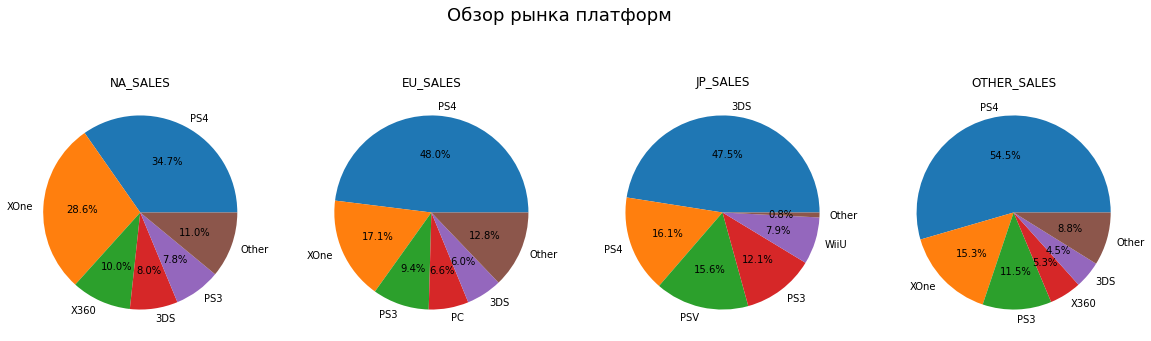

In [52]:
# создадим круговые диаграммы 
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Обзор рынка платформ', fontsize=18, x=0.5)

for i in range(4):
    column_name = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'][i]
    
    df_i = (period_df.groupby('platform')[column_name].sum()
            .reset_index()
            .sort_values(column_name, ascending=False, ignore_index = True)
            .head(5))
    
    other_sales_total = period_df[column_name].sum() - df_i[column_name].sum()
    df_i = df_i.append({'platform': 'Other', column_name: other_sales_total}, ignore_index=True)
    
    ax[i].pie(df_i[column_name], labels=df_i['platform'], autopct='%1.1f%%')
    ax[i].set_title(column_name.split('-')[0].upper())

В Северной Америке популярной платформой является PS4 с долей продаж 25%, за ней следует XOne (21%), Х360 (18,6%) и PS3 (14,5%). Меньше всего доли у 3DS - всего около 9%.

В Европе наиболее популярной платформой является PS4 с долей продаж 36%, затем PS3 (17%), XOne и X360 по 13% и 11%, и меньше всего 3DS - около 8%.

В Японии лидирует 3DS с долей продаж 48%, PS3 занимает второе место (16,5%), PSV и PS4 имеют почти одинаковую долю (13% и 11%), и пятерку замыкает WiiU с долей около 8%.

Стоит отметить, что японцы предпочитают отечественные платформы.

### Самые популярные жанры в разных регионах

In [53]:
# составим сводники по каждому региону
na_sa = period_df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_sa = na_sa.sort_values(by='na_sales', ascending=False).reset_index()
na_sa.head()

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [54]:
# EU
eu_sa = period_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_sa = eu_sa.sort_values(by='eu_sales', ascending=False).reset_index()
eu_sa.head()

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [55]:
# JP
jp_sa = period_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_sa = jp_sa.sort_values(by='jp_sales', ascending=False).reset_index()
jp_sa.head()

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


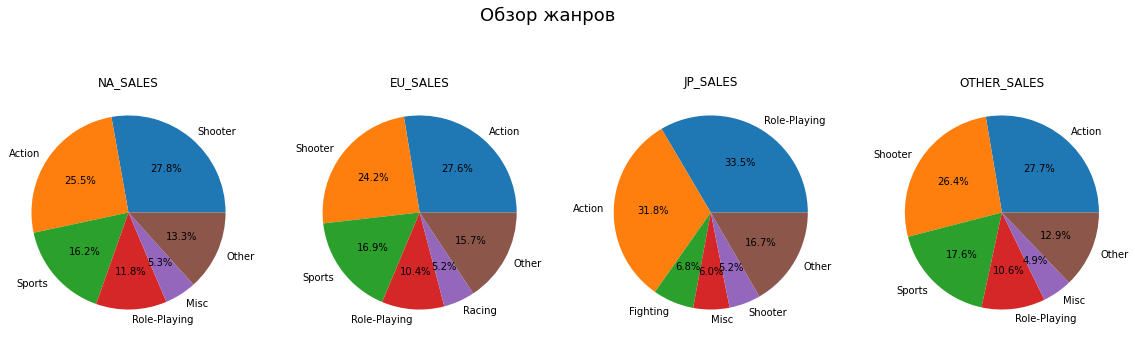

In [56]:
# создадим круговые диаграммы
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Обзор жанров', fontsize=18, x=0.5)

for i in range(4):
    column_name = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'][i]
    
    df_i = (period_df.groupby('genre')[column_name].sum()
            .reset_index()
            .sort_values(column_name, ascending=False, ignore_index = True)
            .head(5))
    
    other_sales_total = period_df[column_name].sum() - df_i[column_name].sum()
    df_i = df_i.append({'genre': 'Other', column_name: other_sales_total}, ignore_index=True)
    
    ax[i].pie(df_i[column_name], labels=df_i['genre'], autopct='%1.1f%%')
    ax[i].set_title(column_name.split('-')[0].upper())

В Северной Америке и Европе покупают практически одни и те же жанры. Единственное, в СА 5-кой замыкает жанр Misc, а в Европе - Racing.

Тут Япония опять отличается от СА и Европы. Любят ролевые игры и Action, затем идут Misc, Fighting и Shooter.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,rating,na_sales
0,M,96.42
1,no rating,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


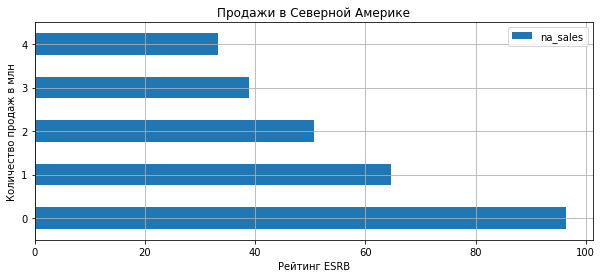

In [57]:
# составим сводники по каждому региону
na_ra = period_df.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_ra = na_ra.sort_values(by='na_sales', ascending=False).reset_index()
display(na_ra)

# создадим график
na_ra.plot(kind='barh', figsize=(10, 4), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж в млн')
plt.title('Продажи в Северной Америке')
plt.show()

,rating,eu_sales
0,M,93.44
1,no rating,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


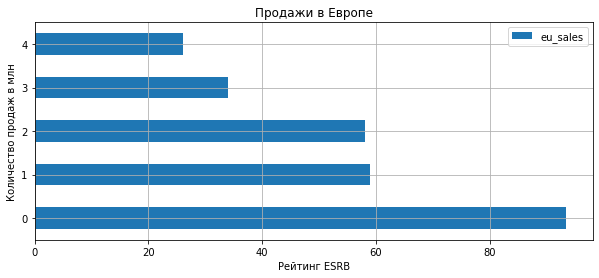

In [58]:
# EU
eu_ra = period_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_ra = eu_ra.sort_values(by='eu_sales', ascending=False).reset_index()
display(eu_ra)

# создааем график
eu_ra.plot(kind='barh', figsize=(10, 4), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж в млн')
plt.title('Продажи в Европе')
plt.show()

,rating,jp_sales
0,no rating,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


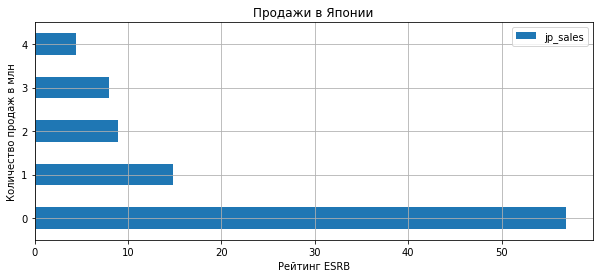

In [59]:
# JP
jp_ra = period_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_ra = jp_ra.sort_values(by='jp_sales', ascending=False).reset_index()
display(jp_ra)

# создаем график
jp_ra.plot(kind='barh', figsize=(10, 4), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж в млн')
plt.title('Продажи в Японии')
plt.show()

Опять та же история. В Северной Америке и Европе показатели почти совпадают. Больше всего популярны игры для взрослых, а затем по убыванию - игры с рейтингами "M" (для взрослых), "E" (для всех) и "T" (для подростков). Также выделяются игры без рейтинга, вероятно, это игры, которым еще не присвоен рейтинг.

В Японии ситуация стабильно отличается от остального мира, в нашем случае от Северной Америки и Европы.

**Выводы** по портретам пользователей регионов:

В целом, Северная Америка и Европа имеют много общего и схожи друг с другом.

Однако Япония, как уже отмечалось, является совершенно другим миром со своими особыми законами и предпочтениями.

## Проверка гипотез

### Проверим первую гипотезу.

- Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Н1 - Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны.

Критерий для проверки гипотезы: t-тест Стьюдента. Уровень статистической значимости 0.05.

In [60]:
# создадим 2 датафрейма по двум платформам без пропусков (так как они имеются в данных)
xone = period_df.loc[(period_df['platform'] == 'XOne') & (period_df['user_score'] > 0), 'user_score']
pc = period_df.loc[(period_df['platform'] == 'PC') & (period_df['user_score'] > 0), 'user_score']

Важно удалить пропуски и «заглушки» перед проведением теста!

In [61]:
alpha = 0.05  
results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


При получении p-значения равного 0.11601398086668832, исходя из стандартной практики, мы не можем отвергнуть нулевую гипотезу на уровне значимости 0.05. 

У нас нет достаточных доказательств для отклонения нулевой гипотезы в пользу альтернативной гипотезы. Вероятность получить такие или более экстремальные результаты, как наблюдаемые данные, при условии, что нулевая гипотеза верна, составляет около 12%. Таким образом, мы не можем сделать вывод о наличии статистически значимого эффекта или различий в рассматриваемых данных.
   

In [63]:
# выясним средний рейтинг XBox по ранее созданой таблице 
xone.mean()

6.594545454545456

In [64]:
# выясним средний рейтинг РС по ранее созданой таблице
pc.mean()

6.298360655737705

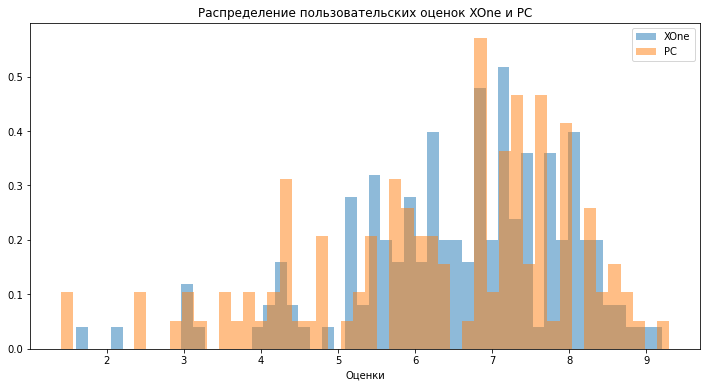

In [65]:
# создаем график 
plt.figure(figsize=(12, 6))
plt.hist(xone, label='XOne', bins=50, alpha=0.5, density=True)
plt.hist(pc, label='PC', bins=50, alpha=0.5, density=True)
plt.xlabel('Оценки')
plt.title('Распределение пользовательских оценок XOne и PC')
plt.legend()
plt.show()

Средние значения практически одинаковые.
p-значение больше alpha - не можем отвергнуть нулевую гипотезу. Средние пользовательские оценки платформ XOne и PC похожи.

### Проверим вторую гипотезу

- Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1 - Средние пользовательские рейтинги жанров Action и Sports разные.

Критерий для проверки гипотезы: t-тест Стьюдента. Уровень статистической значимости 0.05.

In [66]:
# создадим 2 датафрейма по двум платформам без пропусков (так как они имеются в данных)
action = period_df.loc[(period_df['genre'] == 'Action') & (period_df['user_score'] > 0), 'user_score']
sports = period_df.loc[(period_df['genre'] == 'Sports') & (period_df['user_score'] > 0), 'user_score']

In [67]:
alpha = 0.05  
results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


При получении p-значения, равного 1.1825550382644557e-14, мы можем отвергнуть нулевую гипотезу на уровне значимости 0.05.

Интерпретация такого результата означает, что у нас есть достаточные доказательства для отклонения нулевой гипотезы в пользу альтернативной гипотезы. Вероятность получить такие или более экстремальные результаты, как наблюдаемые данные, при условии, что нулевая гипотеза верна, крайне мала (практически нулевая).

Таким образом, в данном случае мы можем сделать вывод о наличии статистически значимых различий или эффекта в данных, подтверждая альтернативную гипотезу.

In [68]:
# выясним средний рейтинг 
action.mean()

6.760606060606061

In [69]:
# выясним средний рейтинг 
sports.mean()

5.2251968503937

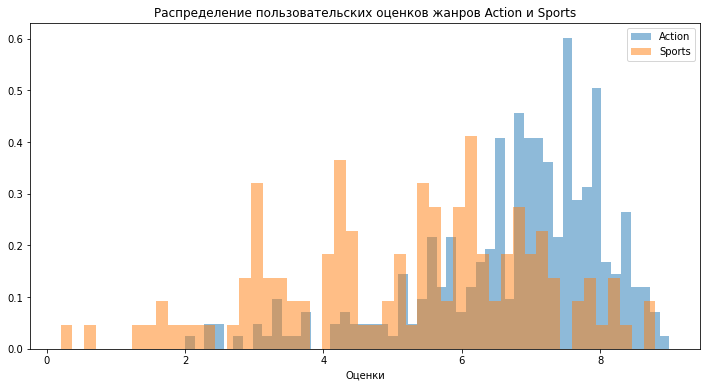

In [70]:
# создаем график 
plt.figure(figsize=(12, 6))
plt.hist(action, label='Action', bins=50, alpha=0.5, density=True)
plt.hist(sports, label='Sports', bins=50, alpha=0.5, density=True)
plt.xlabel('Оценки')
plt.title('Распределение пользовательских оценков жанров Action и Sports')
plt.legend()
plt.show()

Средние значения оценок жанров Action и Sports существенно различаются.
p-значение меньше заданного значения alpha, что позволяет нам отвергнуть нулевую гипотезу. Таким образом, мы можем сделать вывод, что средние пользовательские оценки жанров Action и Sports отличаются.

# Общий вывод

1. В результате анализа выявили:
    - Индустрия начала развиваться с 80-х годов прошлого века, и резкий скачок с выходом PlayStation, а пик продаж приходится на 2005 и 2011 годы. Также выяснили, что самые популярные платформы от таких гигантов, как Sony, Microsoft и Nintendo (PlayStation, Xbox и Nintendo);
    - За актуальный период взяли 2014 - 2016 годы, так как в бизнесе дальше уже считается устаревшими, а лидеры те же PlayStation, Xbox и Nintendo. За актуальный период по выручкам выделяются эти же платформы;
    - Выяснили, что зависимость продаж от отзывов критиков превалирует (незначительно) над отзывами от пользователей. Но стоит отметить, что отзывы не единственный фактор, который влияет на продажи. Ну а по жанрам лидируют экшн, шутеры и спортивные игры. Меньше всего пазлы, стратегии и симуляторы.
    
2. Главные выводы. Исходя из проделанной работы, можно сказать, что закономерностей, влияющих на успешность игры, достаточно. Мы изучили 3 рынка - Северную Америку, Европу и Японию. Каждый рынок уникален! Но СА и Европа до боли схожи. Североамериканцы и европейцы предпочитают практически одинаковые платформы для игр и похожие жанры, но японцы склонны к выбору японских платформ. Выяснили, что продажи игр не сильно зависят от отзывов критиков и геймеров. Поэтому, чтобы спланировать рекламную компанию на потенциально популярный продукт, надо отталкиваться от рынка продакт-плейсмента, так как уже выяснили, что каждый регион уникален.


3. Рекомендации. Стоит также обратить внимание на выпуск новых игровых платформ и обновления существующей линейки (PS2, PS3, PS4 и т.д.) и исходя из этого уже принимать решения для дальнейшего развития бизнеса.